# Display Images
- This notebook will display adversarial/counterfactual images.

In [35]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms as T
from wilds import get_dataset

In [36]:
inverse_transform = T.Compose([
    T.ToPILImage()
])
transform = T.Compose([
                T.Resize(256),
                T.CenterCrop(224),
                T.ToTensor()
            ])

Loading Original perturbed image...
Label: 1


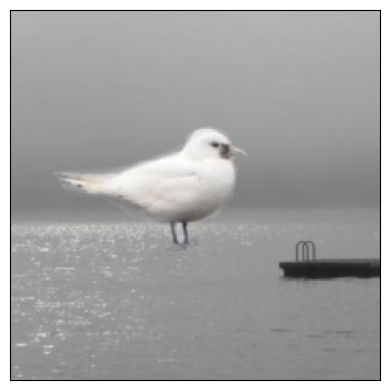

Loading L2 perturbed image...
Label: 0


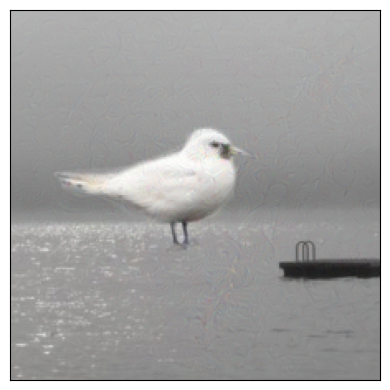

Loading Linf perturbed image...
Label: 0


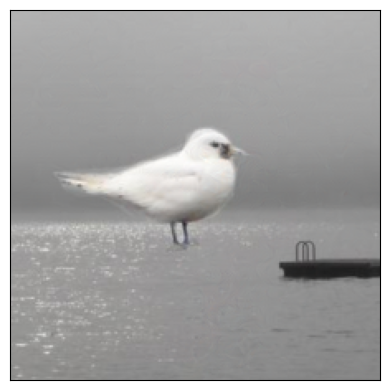

Loading GDPR_CFE perturbed image...
Label: 0


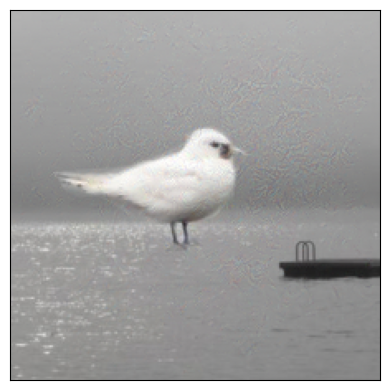

In [60]:
modes=['Original', 'L2', 'Linf', 'GDPR_CFE']
sample_idx = 1500

for mode in modes:
    print(f'Loading {mode} perturbed image...')
    plt.figure(figsize=(4,4))

    if mode in ['L2', 'Linf', 'GDPR_CFE', 'SCFE']:
        pert_data = torch.load(f'../SCRATCH/CFE_datasets/WaterBirds_{mode}', weights_only=False)['adv_data']
        pert_label = torch.load(f'../SCRATCH/CFE_datasets/WaterBirds_{mode}', weights_only=False)['adv_labels']
        pert_image = pert_data[sample_idx]
        pert_label = pert_label[sample_idx]
    elif mode == 'Original':
        dataset = get_dataset(dataset="waterbirds", download=False, root_dir='../SCRATCH/')
        pert_data = dataset.get_subset("train", transform=transform)
        pert_image = pert_data[sample_idx][0]
        pert_label = pert_data[sample_idx][1]
    else:
        raise NotImplementedError
    print(f'Label: {pert_label.item()}')
    file_save_name = f'./results/perturbed_images/WaterBirds_{mode}_sample_idx_{sample_idx}.png'

    plt.imshow(np.transpose(pert_image.numpy(), (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.savefig(file_save_name, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
